<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Machine-Learning-Scientist-with-Python/blob/main/01_Creating_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Feature creation & extraction</h1> 
</strong>

---

In this chapter, you will explore what feature engineering is and how to get started with applying it to real-world data. You will load, explore and visualize a survey response dataset, and in doing so you will learn about its underlying data types and why they have an influence on how you should engineer your features. Using the pandas package you will create new features from both categorical and continuous columns.


In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Machine-Learning-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Machine-Learning-Scientist-with-Python'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 604 (delta 53), reused 240 (delta 25), pack-reused 329
Receiving objects: 100% (604/604), 198.75 MiB | 32.49 MiB/s, done.
Resolving deltas: 100% (179/179), done.
Checking out files: 100% (296/296), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#sns.set_theme()

%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Machine-Learning-Scientist-with-Python/09_Feature_Engineering_for_Machine_Learning_in_Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Machine-Learning-Scientist-with-Python/09_Feature_Engineering_for_Machine_Learning_in_Python/_dataset


In [4]:
ls

Combined_DS_v10.csv  inaugural_speeches.csv


## Why generate features?


Most machine learning algorithms require their input data to be represented as a vector or a matrix, and many assume that the data is distributed normally.

In the real world, more often than not you will receive data that is not in this format. You will also need to work with many different types of data, some data types you will often encounter are:

- *Different types of data*
    - **Continuous:** Either integers (or whole numbers) or floats (decimals)
    - **Categorical**: One of a limited set of values, e.g., gender, country of birth
    - **Ordinal:** Ranked values often with no details of distance between them
    - **Boolean:** True/False values
    - **Datetime**: Dates and Times


Dealing with these is manageable, but requires a well thought out approach.

__Feature engineering__ is often overlooked in machine learning discussions, but any real-world practitioner will confirm that data manipulation and feature engineering is the most important aspect of the project.



### Getting to know your data
You will be working with a modified subset of the [Stackoverflow survey response data](https://insights.stackoverflow.com/survey/2018/#overview) in the first three chapters of this course. This data set records the details, and preferences of thousands of users of the StackOverflow website.

In [5]:
# Import the data
so_survey_df = pd.read_csv('Combined_DS_v10.csv')

# Print the first five rows of the DataFrame
so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [6]:
# Print the data type of each column
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


### Selecting specific data types
Often a data set will contain columns with several different data types (like the one you are working with). The majority of machine learning models require you to have a consistent data type across features. Similarly, most feature engineering techniques are applicable to only one type of data at a time. For these reasons among others, you will often want to be able to access just the columns of certain types when working with a DataFrame.

In [7]:
# Create subset of only the numberic columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float']) # 'bool','category', 'datetime'

# Print the column names contained in so_numeric_df
print(so_numeric_df.columns)
so_numeric_df.head() 

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,NaN,NaN,21,13
1,70841.0,7.0,38,9
2,NaN,8.0,45,11
3,21426.0,NaN,46,12
4,41671.0,8.0,39,7


## Dealing with categorical features

- **Encoding categorical features**
    - ***One-hot encoding***
    - ***Dummy encoding***

- __One-hot__ $vs.$ __dummies__
    - ***One-hot encoding***: Explainable features
    - ***Dummy encoding***: Necessary information without duplication

### One-hot encoding and dummy variables
To use categorical variables in a machine learning model, you first need to represent them in a quantitative way. The two most common approaches are to one-hot encode the variables using or to use dummy variables. In this exercise, you will create both types of encoding, and compare the created column sets. 

In [8]:
list(so_survey_df['Country'].unique())

['South Africa',
 'Sweeden',
 'UK',
 'Russia',
 'France',
 'Spain',
 'USA',
 'India',
 'Ireland',
 'Ukraine']

In [9]:
dict(so_survey_df['Country'].value_counts())

{'France': 115,
 'India': 95,
 'Ireland': 5,
 'Russia': 97,
 'South Africa': 166,
 'Spain': 134,
 'Sweeden': 119,
 'UK': 95,
 'USA': 164,
 'Ukraine': 9}

In [10]:
# Convert the Country column to a one hot encoded DataFrame
one_hot_encoded = pd.get_dummies(so_survey_df,
                                 columns=['Country'],
                                 prefix='OH')

# Print the columns names
one_hot_encoded.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,OH_France,OH_India,OH_Ireland,OH_Russia,OH_South Africa,OH_Spain,OH_Sweeden,OH_UK,OH_USA,OH_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,0,1,0,0


In [11]:
# Convert the Country column to a one hot encoded DataFrame
dummy = pd.get_dummies(so_survey_df,
                       columns=['Country'],
                       drop_first=True, # To get Dummie Encoding set the drop first to true
                       prefix='DM')

# Print the columns names
dummy.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,DM_India,DM_Ireland,DM_Russia,DM_South Africa,DM_Spain,DM_Sweeden,DM_UK,DM_USA,DM_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,1,0,0


>Did you notice that the column for **France** was missing when you created **dummy variables**? Now you can choose to use one-hot encoding or dummy variables where appropriate.

### Dealing with uncommon categories
Some features can have many different categories but a very uneven distribution of their occurrences. Take for example Data Science's favorite languages to code in, some common choices are Python, R, and Julia, but there can be individuals with bespoke choices, like FORTRAN, C etc. In these cases, you may not want to create a feature for each value, but only the more common occurrences.

In [12]:
# Create a series out of the Country columns
countries = so_survey_df.Country

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [13]:
# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Print the top 5 rows in the mask series
print(mask.head())

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


In [14]:
# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Other            14
Name: Country, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Numeric variables


> Most **Machine Learning** models will require your data to be in numeric format. 

> Anything that can be __Quantitatively__ measured can be recorded as numeric data.

### Binarizing columns

While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column. In the `so_survey_df` data, you have a large number of survey respondents that are working voluntarily (without pay). You will create a new column titled `Paid_Job` indicating whether each person is paid (their salary is greater than zero).

In [15]:
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0 to 1
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
so_survey_df[['Paid_Job', 'ConvertedSalary']].head()

,Paid_Job,ConvertedSalary
0,0,NaN
1,1,70841.0
2,0,NaN
3,1,21426.0
4,1,41671.0


In [16]:
so_survey_df['Paid_Job'].value_counts()

1    663
0    336
Name: Paid_Job, dtype: int64

### Binning values
For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

Bins are created using `pd.cut(df['column_name'], bins)` where `bins` can be an integer specifying the number of evenly spaced bins, or a list of bin boundaries.

In [17]:
print(so_survey_df['ConvertedSalary'].min())
print(so_survey_df['ConvertedSalary'].max())
print(so_survey_df['ConvertedSalary'].median())

0.0
2000000.0
55562.0


In [18]:
# Bin the continouos variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=5)

# Print the first 5 rows of the equal_binned column
so_survey_df[['equal_binned', 'ConvertedSalary']].head()

,equal_binned,ConvertedSalary
0,NaN,NaN
1,"(-2000.0, 400000.0]",70841.0
2,NaN,NaN
3,"(-2000.0, 400000.0]",21426.0
4,"(-2000.0, 400000.0]",41671.0


In [19]:
# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
so_survey_df[['boundary_binned', 'ConvertedSalary']].head()

,boundary_binned,ConvertedSalary
0,NaN,NaN
1,Medium,70841.0
2,NaN,NaN
3,Low,21426.0
4,Low,41671.0


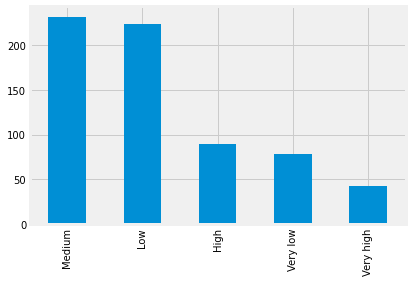

In [20]:
so_survey_df['boundary_binned'].value_counts().plot(kind='bar')
plt.show()

## __Connect with Me__ 
--- 
[<img align="left" alt="codeSTACKr | Twitter" width="40px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />][twitter] 
[<img align="left" alt="codeSTACKr | LinkedIn" width="40px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />][linkedin] 
[<img align="left" alt="codeSTACKr.com" width="40px" src="https://raw.githubusercontent.com/iconic/open-iconic/master/svg/globe.svg" />][StackExchange AI] 
[twitter]: https://twitter.com/F4izy 
--- 
[linkedin]: https://www.linkedin.com/in/mohd-faizy/ 
--- 
[StackExchange AI]: https://mohd-faizy.github.io
--- 
--- 
--- 
---